In [1]:
# Airlines DBScan 
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
import seaborn as sns
from sklearn.preprocessing import StandardScaler
sns.set_theme(style='darkgrid',palette='viridis')
%matplotlib inline

In [2]:
df=pd.read_excel("EastWestAirlines.xlsx",sheet_name='data',index_col="ID#")
df.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                      
1      28143           0          1          1          1          174   
2      19244           0          1          1          1          215   
3      41354           0          1          1          1         4123   
4      14776           0          1          1          1          500   
5      97752           0          4          1          1        43300   

     Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                       
1              1                  0                0               7000   
2              2                  0                0               6968   
3              4                  0                0               7034   
4              1                  0                0               6952   
5             26               2077                4               6935   

     Award?  
ID#          
1         0  
2         0  
3         0  
4         0  
5         1

In [3]:
df.isna().sum()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


Balance    Qual_miles    cc1_miles    cc2_miles    cc3_miles  \
count  3.999000e+03   3999.000000  3999.000000  3999.000000  3999.000000   
mean   7.360133e+04    144.114529     2.059515     1.014504     1.012253   
std    1.007757e+05    773.663804     1.376919     0.147650     0.195241   
min    0.000000e+00      0.000000     1.000000     1.000000     1.000000   
25%    1.852750e+04      0.000000     1.000000     1.000000     1.000000   
50%    4.309700e+04      0.000000     1.000000     1.000000     1.000000   
75%    9.240400e+04      0.000000     3.000000     1.000000     1.000000   
max    1.704838e+06  11148.000000     5.000000     3.000000     5.000000   

         Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count    3999.000000   3999.00000        3999.000000      3999.000000   
mean    17144.846212     11.60190         460.055764         1.373593   
std     24150.967826      9.60381        1400.209171         3.793172   
min         0.000000      0.00000           0.000000         0.000000   
25%      1250.000000      3.00000           0.000000         0.000000   
50%      7171.000000     12.00000           0.000000         0.000000   
75%     23800.500000     17.00000         311.000000         1.000000   
max    263685.000000     86.00000       30817.000000        53.000000   

       Days_since_enroll       Award?  
count         3999.00000  3999.000000  
mean          4118.55939     0.370343  
std           2065.13454     0.482957  
min              2.00000     0.000000  
25%           2330.00000     0.000000  
50%           4096.00000     0.000000  
75%           5790.50000     1.000000  
max           8296.00000     1.000000

In [4]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')

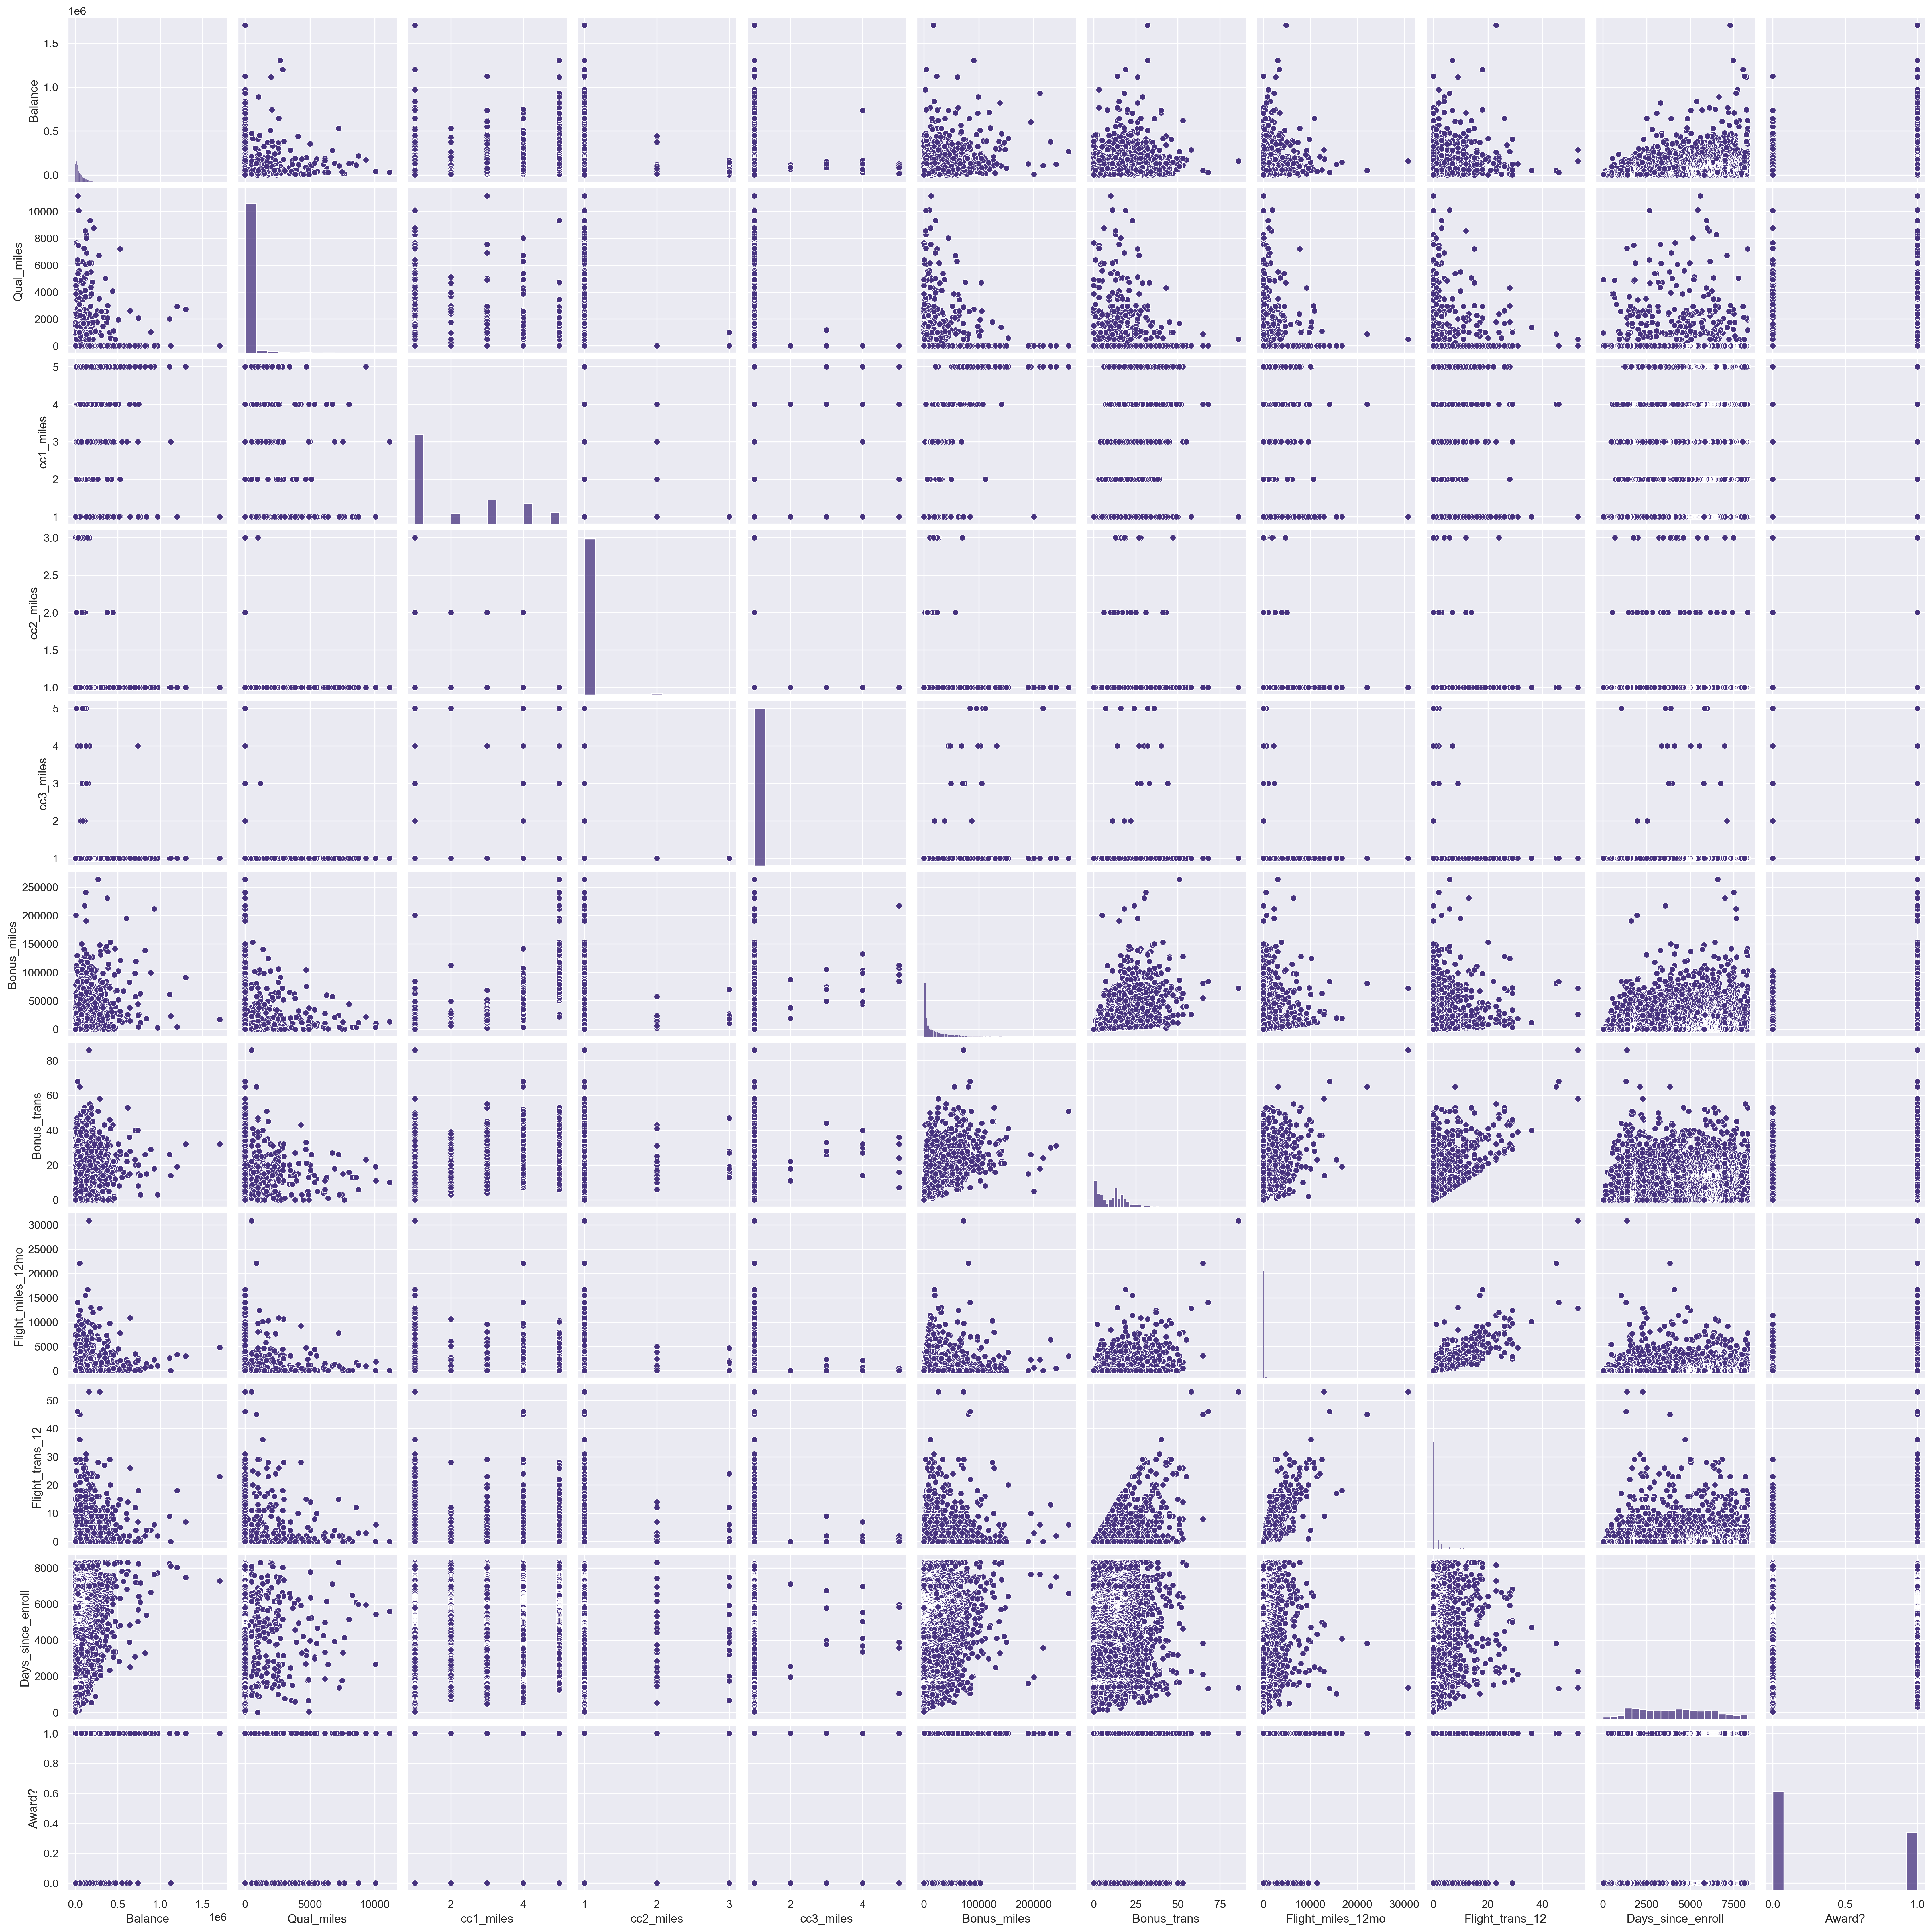

In [5]:
sns.pairplot(df)

In [6]:
from sklearn.preprocessing import StandardScaler

stdscale=StandardScaler()
scaledf=stdscale.fit_transform(df)
x=pd.DataFrame(columns=df.columns,data=scaledf)
x.head()
x.describe()

Balance    Qual_miles     cc1_miles     cc2_miles     cc3_miles  \
count  3.999000e+03  3.999000e+03  3.999000e+03  3.999000e+03  3.999000e+03   
mean   5.756558e-16 -7.588884e-17  9.288838e-15 -7.447781e-16 -4.371208e-16   
std    1.000125e+00  1.000125e+00  1.000125e+00  1.000125e+00  1.000125e+00   
min   -7.304396e-01 -1.862987e-01 -7.695784e-01 -9.824189e-02 -6.276658e-02   
25%   -5.465676e-01 -1.862987e-01 -7.695784e-01 -9.824189e-02 -6.276658e-02   
50%   -3.027332e-01 -1.862987e-01 -7.695784e-01 -9.824189e-02 -6.276658e-02   
75%    1.866028e-01 -1.862987e-01  6.831212e-01 -9.824189e-02 -6.276658e-02   
max    1.618884e+01  1.422486e+01  2.135821e+00  1.344898e+01  2.042732e+01   

        Bonus_miles   Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count  3.999000e+03  3.999000e+03       3.999000e+03     3.999000e+03   
mean  -5.515024e-16 -2.877696e-15       5.781822e-16    -1.206323e-15   
std    1.000125e+00  1.000125e+00       1.000125e+00     1.000125e+00   
min   -7.099918e-01 -1.208203e+00      -3.286033e-01    -3.621679e-01   
25%   -6.582276e-01 -8.957878e-01      -3.286033e-01    -3.621679e-01   
50%   -4.130308e-01  4.145743e-02      -3.286033e-01    -3.621679e-01   
75%    2.756198e-01  5.621492e-01      -1.064658e-01    -9.850333e-02   
max    1.020957e+01  7.747696e+00       2.168300e+01     1.361205e+01   

       Days_since_enroll        Award?  
count       3.999000e+03  3.999000e+03  
mean        1.406727e-15 -3.352657e-15  
std         1.000125e+00  1.000125e+00  
min        -1.993611e+00 -7.669193e-01  
25%        -8.661823e-01 -7.669193e-01  
50%        -1.092530e-02 -7.669193e-01  
75%         8.097050e-01  1.303918e+00  
max         2.023095e+00  1.303918e+00

In [7]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.5, min_samples=5)

y = db.fit_predict(x)
y
x

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    -0.451141   -0.186299  -0.769578  -0.098242  -0.062767    -0.702786   
1    -0.539457   -0.186299  -0.769578  -0.098242  -0.062767    -0.701088   
2    -0.320031   -0.186299  -0.769578  -0.098242  -0.062767    -0.539253   
3    -0.583799   -0.186299  -0.769578  -0.098242  -0.062767    -0.689286   
4     0.239678   -0.186299   1.409471  -0.098242  -0.062767     1.083121   
...        ...         ...        ...        ...        ...          ...   
3994 -0.547079   -0.186299  -0.769578  -0.098242  -0.062767    -0.356960   
3995 -0.091465   -0.186299  -0.769578  -0.098242  -0.062767    -0.669367   
3996 -0.000043   -0.186299   0.683121  -0.098242  -0.062767     0.343804   
3997 -0.185607   -0.186299  -0.769578  -0.098242  -0.062767    -0.689286   
3998 -0.700508   -0.186299  -0.769578  -0.098242  -0.062767    -0.709992   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0       -1.104065          -0.328603        -0.362168           1.395454   
1       -0.999926          -0.328603        -0.362168           1.379957   
2       -0.791649          -0.328603        -0.362168           1.411920   
3       -1.104065          -0.328603        -0.362168           1.372208   
4        1.499394           1.154932         0.692490           1.363975   
...           ...                ...              ...                ...   
3994    -0.791649          -0.185750        -0.098503          -1.315120   
3995    -0.687511          -0.328603        -0.362168          -1.318994   
3996    -0.375096          -0.328603        -0.362168          -1.315604   
3997    -1.104065           0.028531        -0.098503          -1.316088   
3998    -1.208203          -0.328603        -0.362168          -1.317541   

        Award?  
0    -0.766919  
1    -0.766919  
2    -0.766919  
3    -0.766919  
4     1.303918  
...        ...  
3994  1.303918  
3995  1.303918  
3996  1.303918  
3997 -0.766919  
3998 -0.766919  

[3999 rows x 11 columns]

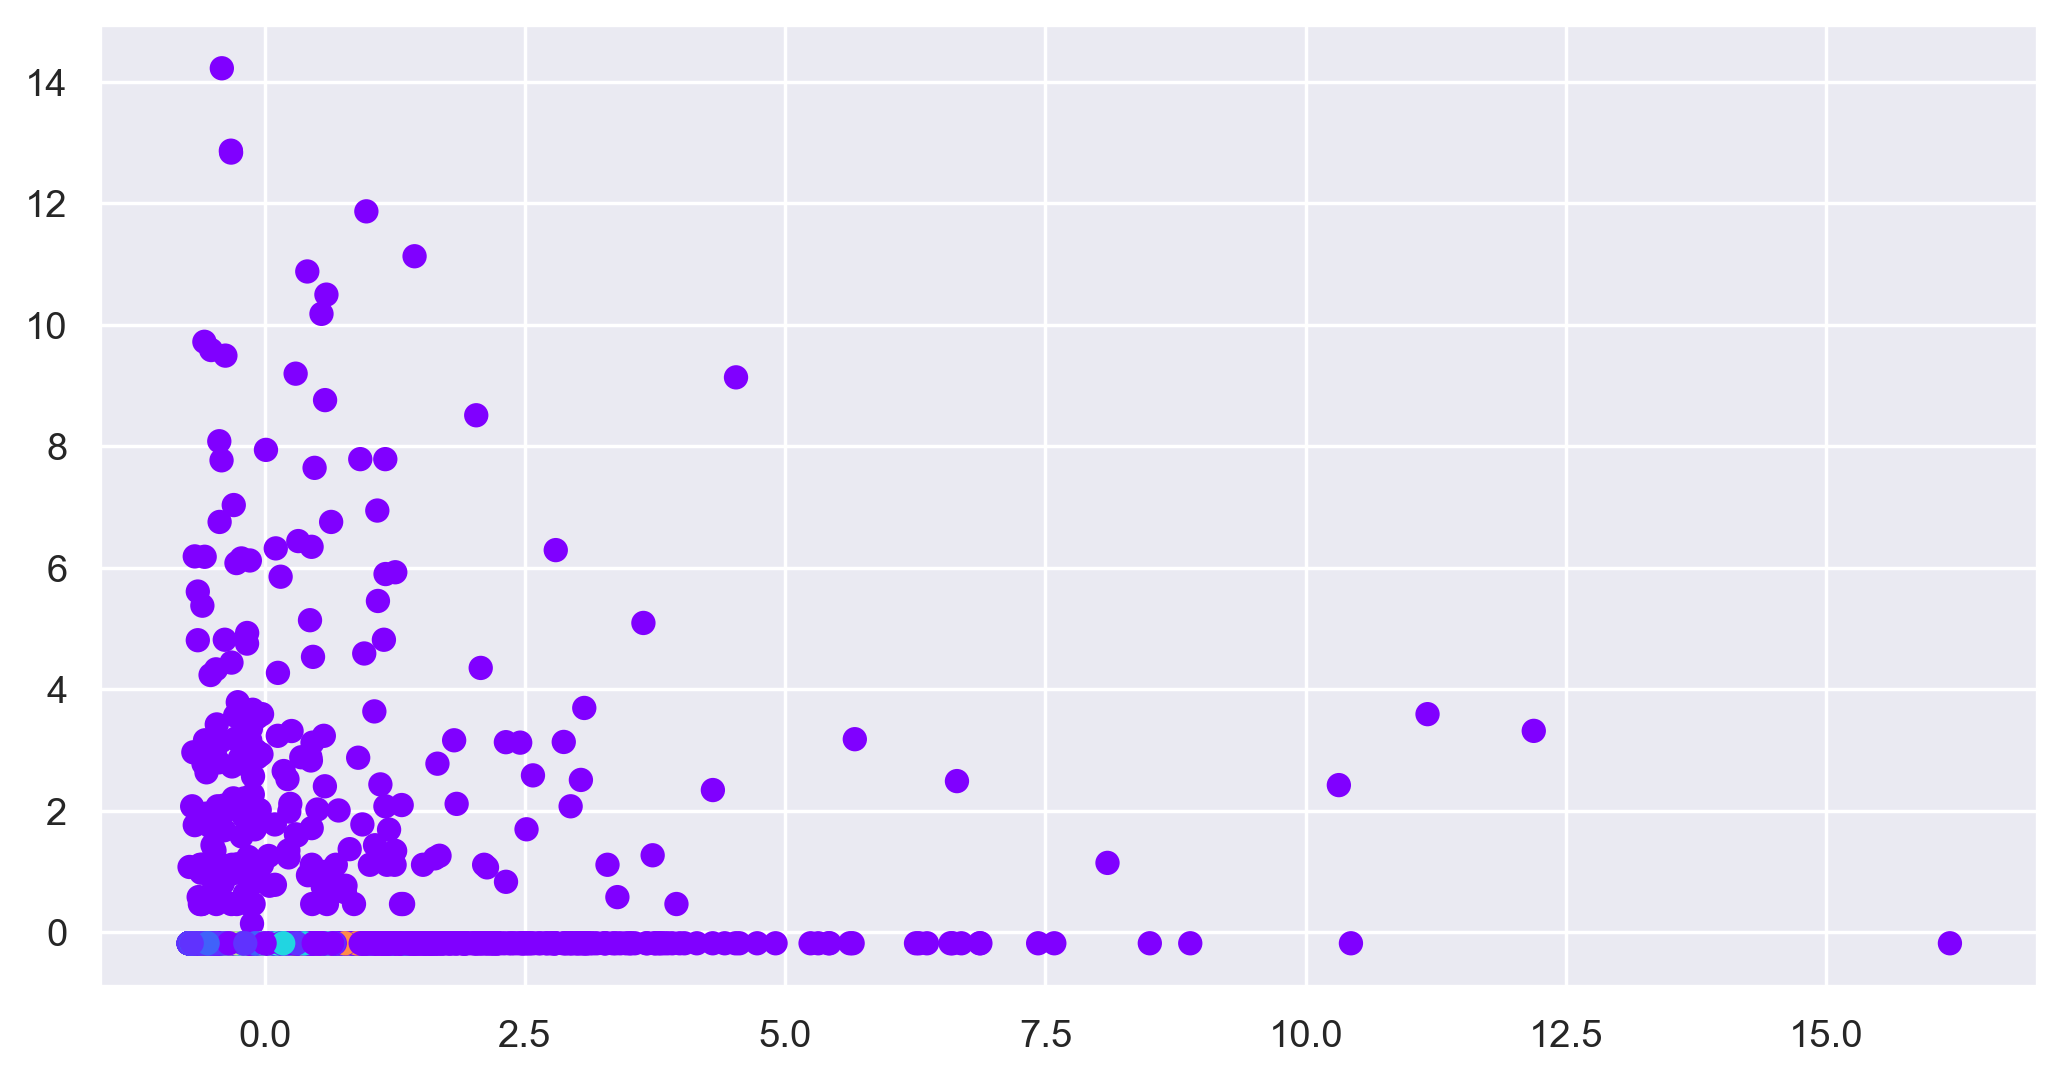

In [8]:
plt.scatter(x['Balance'],x['Qual_miles'],c = y,cmap='rainbow')

In [9]:
from sklearn.metrics import silhouette_score
silhouette_score(x,y)

-0.07834757831741163

A silhouette score ranges from -1 to 1. A score close to 1 indicates that samples are well clustered, with clear separation between clusters. A score close to -1 suggests that samples are assigned to the wrong clusters, while a score around 0 indicates overlapping or ambiguous clusters.
a silhouette score of -0.07834757831741163 suggests that the clustering of the data is not very well defined. The samples may have overlapping or ambiguous clusters, indicating that the data points are not clearly separated into distinct groups.

# Hyperparameter tuning
Selecting Min_samples:
Number of columns + 1
Number of columns * 2
Number of Dimension + 1
Always keep min_sample at least 3.

# Finding out the best eps value(K-dist Plot)
- This technique calculates the average distance between each point and its k nearest neighbors, where k is the MinPts value you selected. 
- The average k-distances are then plotted in ascending order on a k-distance graph. You’ll find the optimal value for ε at the point of maximum curvature (i.e. where the graph has the greatest slope).

In [10]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=3).fit(x)
d,i = neigh.kneighbors(x)
pd.DataFrame(d)
d

array([[0.        , 0.11184685, 0.12034246],
       [0.        , 0.11406276, 0.11437601],
       [0.        , 0.16540223, 0.19458949],
       ...,
       [0.        , 0.16614779, 0.28024323],
       [0.        , 0.25725534, 0.27167409],
       [0.        , 0.00270574, 0.0112955 ]])

Text(0, 0.5, 'Epsilon value')

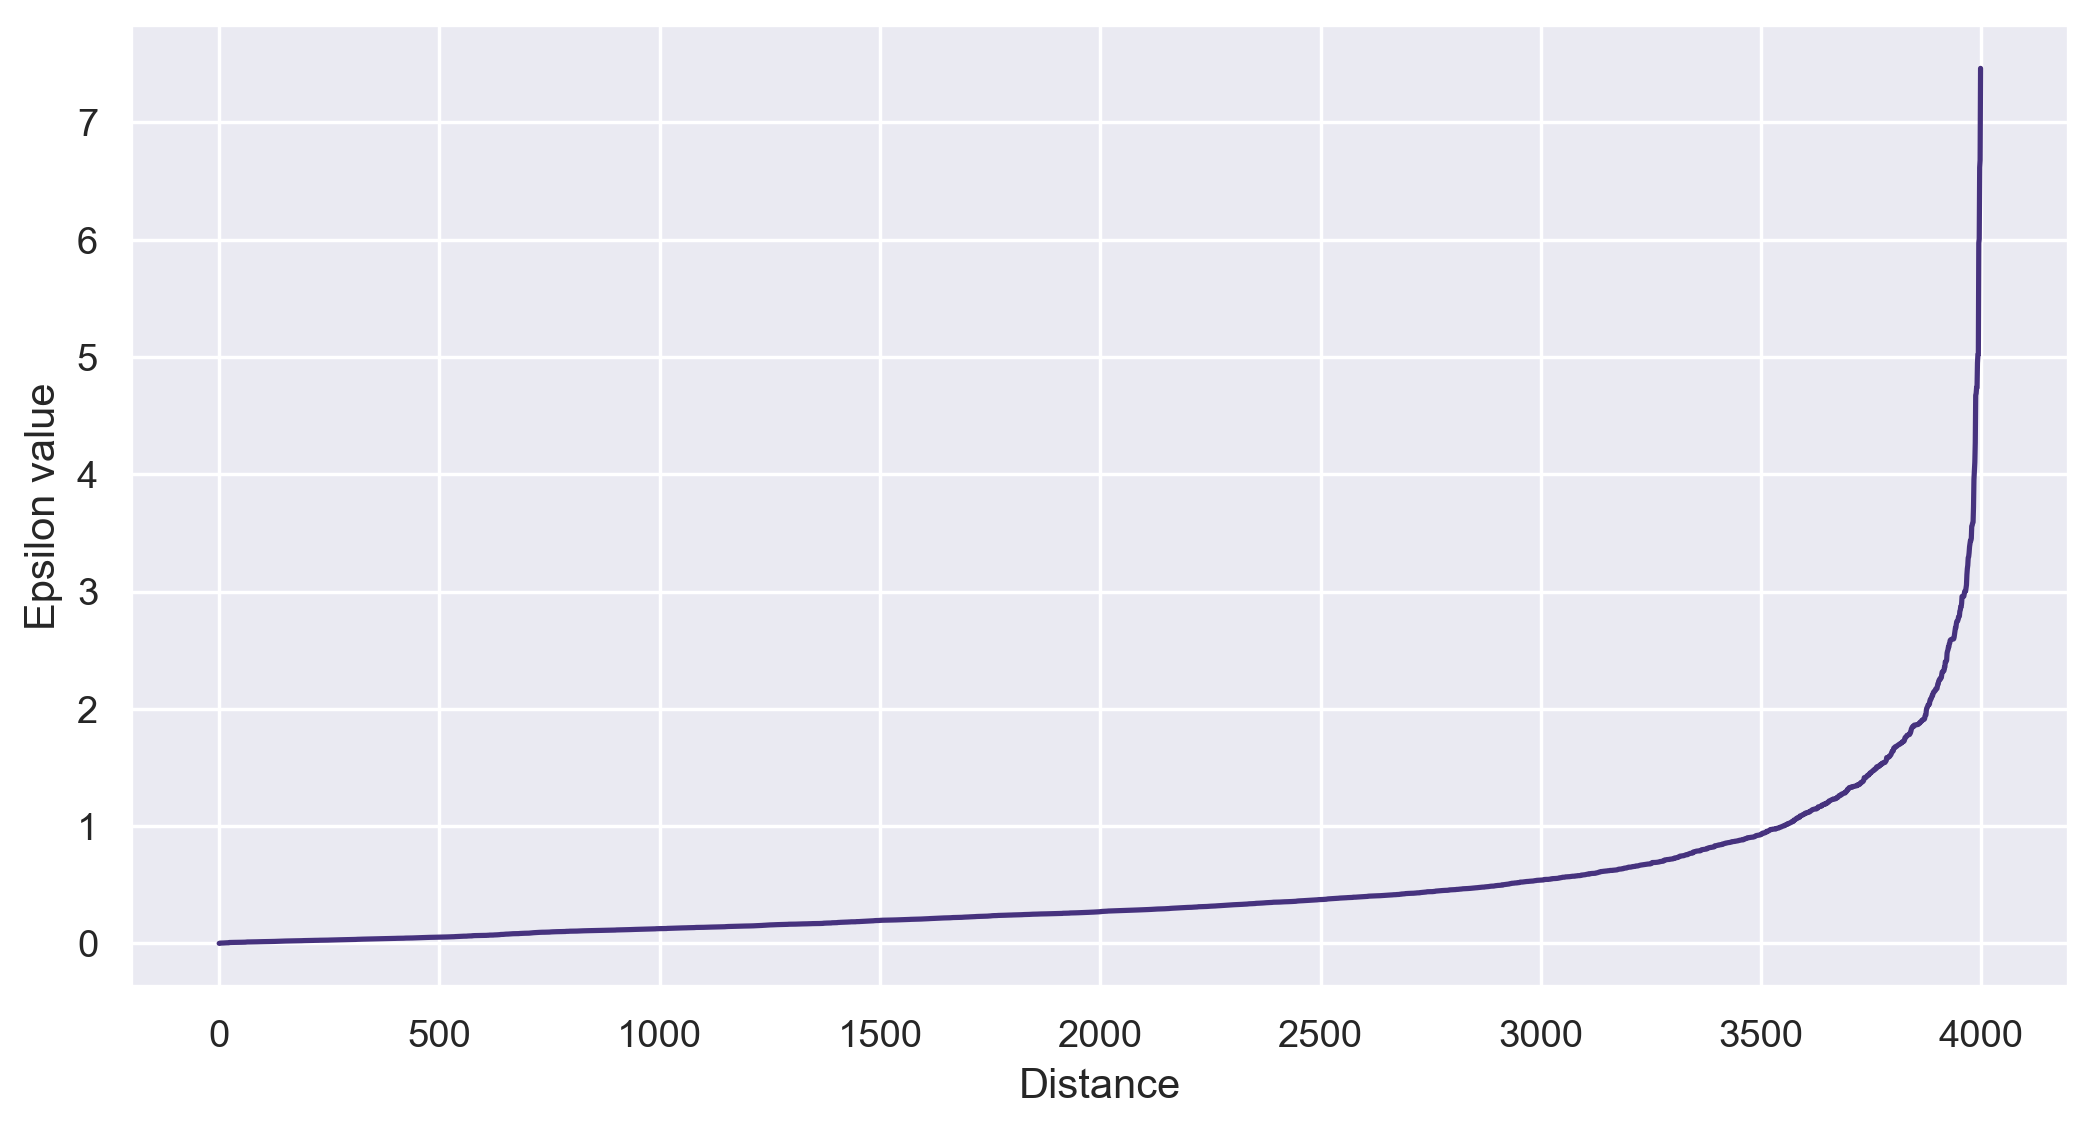

In [11]:
dist = np.sort(d[:,1])
plt.plot(dist)
plt.xlabel('Distance')
plt.ylabel('Epsilon value')

In [12]:
db = DBSCAN(eps=2,min_samples=3)
ypred = db.fit_predict(x)
ypred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

# Evalute the model

In [13]:
silhouette_score(x,ypred)

0.2457363433586349

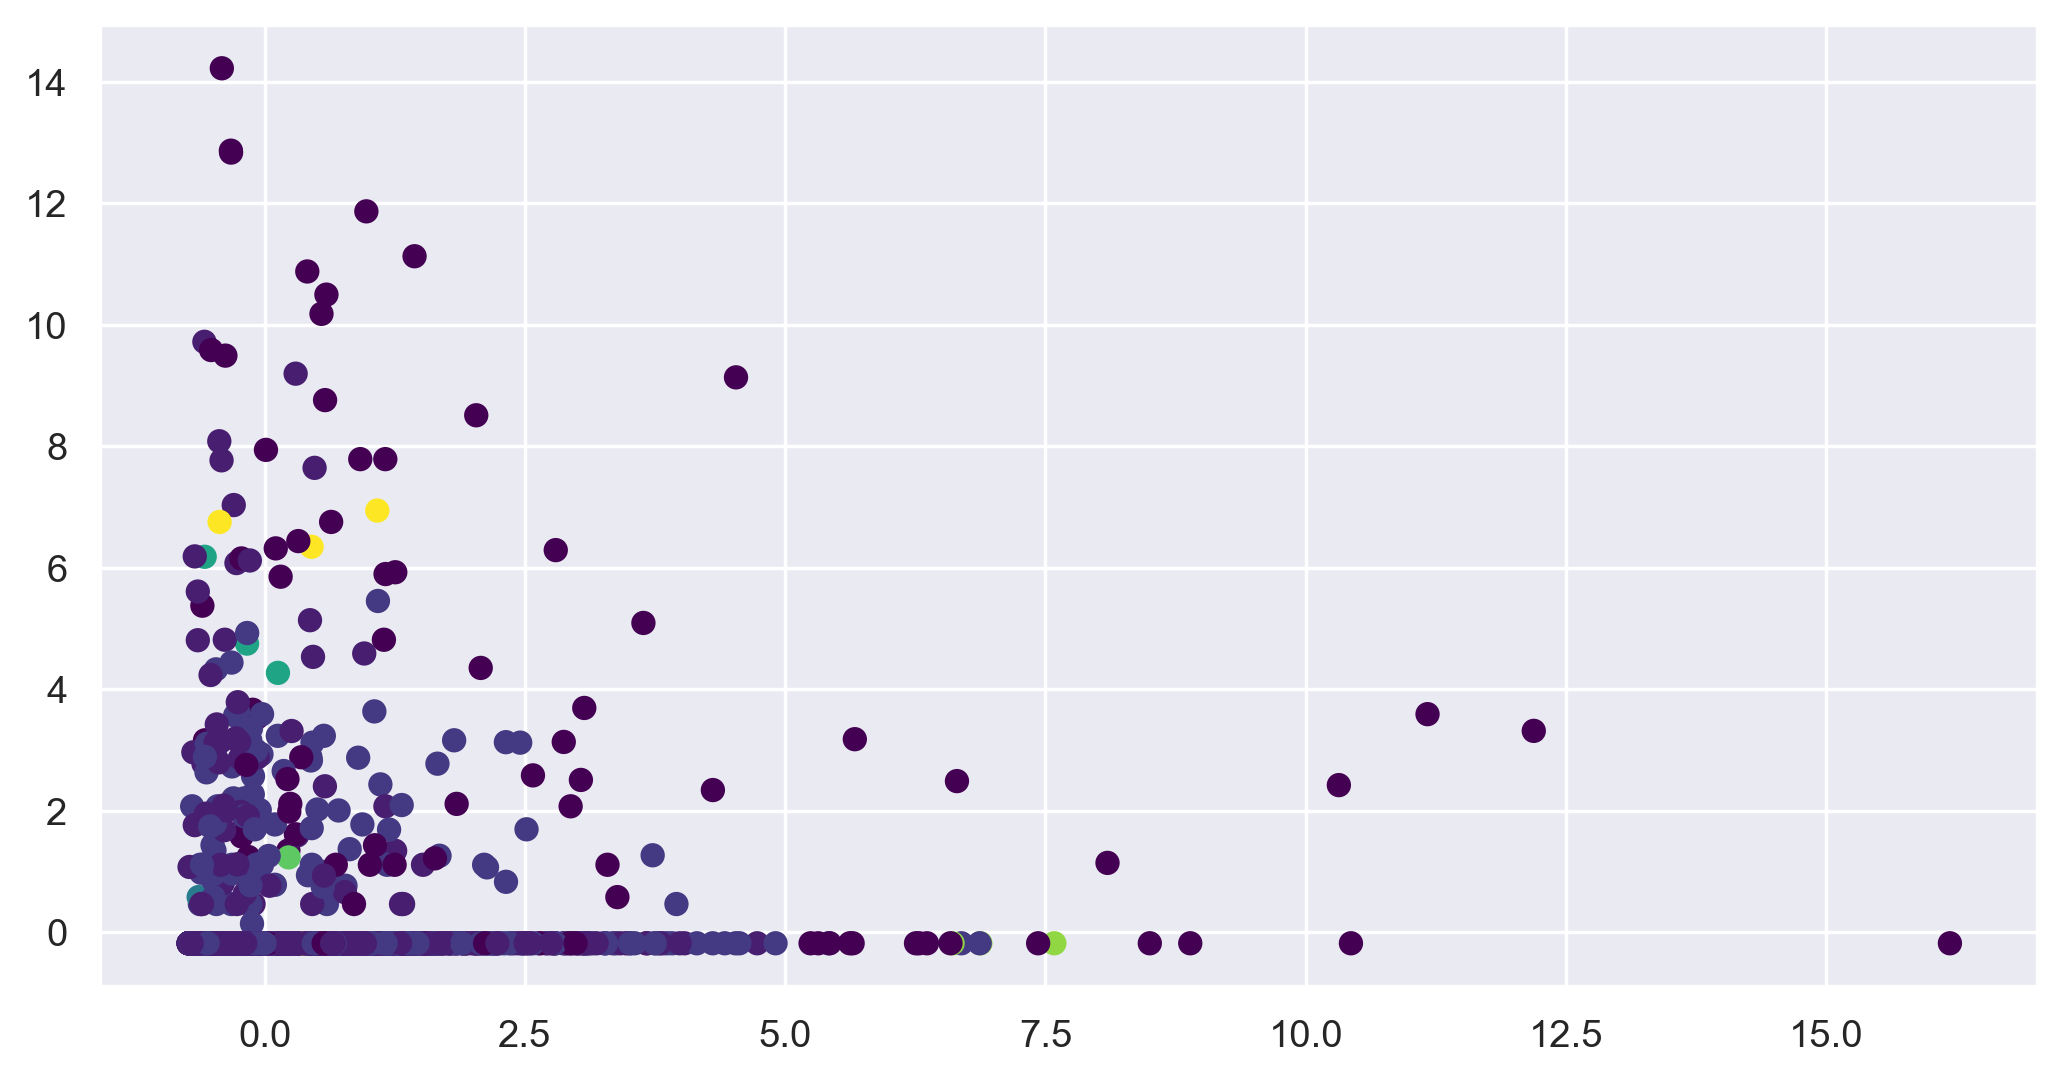

In [14]:

plt.scatter(x.iloc[:,0],x.iloc[:,1],c = ypred,cmap='viridis')

In [15]:
df['cluster'] = ypred
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
1       28143           0          1          1          1          174   
2       19244           0          1          1          1          215   
3       41354           0          1          1          1         4123   
4       14776           0          1          1          1          500   
5       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
4017    18476           0          1          1          1         8525   
4018    64385           0          1          1          1          981   
4019    73597           0          3          1          1        25447   
4020    54899           0          1          1          1          500   
4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
1               1                  0                0               7000   
2               2                  0                0               6968   
3               4                  0                0               7034   
4               1                  0                0               6952   
5              26               2077                4               6935   
...           ...                ...              ...                ...   
4017            4                200                1               1403   
4018            5                  0                0               1395   
4019            8                  0                0               1402   
4020            1                500                1               1401   
4021            0                  0                0               1398   

      Award?  cluster  
ID#                    
1          0        0  
2          0        0  
3          0        0  
4          0        0  
5          1        1  
...      ...      ...  
4017       1        1  
4018       1        1  
4019       1        1  
4020       0        0  
4021       0        0  

[3999 rows x 12 columns]

In [16]:
df.groupby('cluster').agg('mean')

Balance   Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
cluster                                                                
-1       267601.354610  1746.205674   3.000000    1.06383   1.347518   
 0        57970.120619    62.784026   1.697637    1.00000   1.000000   
 1        80686.144874   108.636701   2.658990    1.00000   1.000000   
 2        40618.000000     0.000000   1.000000    2.00000   1.000000   
 3        51096.000000     0.000000   1.000000    3.00000   1.000000   
 4        73323.400000   117.800000   1.000000    1.00000   1.000000   
 5        39218.500000     0.000000   1.000000    2.00000   1.000000   
 6        52906.000000  4062.333333   4.333333    1.00000   1.000000   
 7        20111.500000     0.000000   1.000000    3.00000   1.000000   
 8       106247.500000   273.500000   1.000000    1.00000   1.000000   
 9       781291.333333     0.000000   1.000000    1.00000   1.000000   
 10      164878.000000     0.000000   1.000000    1.00000   1.000000   
 11      110616.000000  5310.666667   1.000000    1.00000   1.000000   

          Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
cluster                                                                  
-1       58378.815603    28.205674        3940.184397        10.787234   
 0        9815.497148     8.915648         191.209046         0.563977   
 1       26317.071322    14.537890         530.512630         1.650074   
 2        8444.142857    14.285714         250.000000         0.714286   
 3       15561.666667    14.333333          44.444444         0.222222   
 4       12311.200000    30.000000        3734.600000        24.800000   
 5        9189.250000    13.500000         209.375000         0.812500   
 6       54419.000000    15.666667         366.666667         1.000000   
 7       18085.500000    20.000000         950.000000         2.500000   
 8        8641.000000    19.250000        6991.000000        18.000000   
 9       17995.000000     8.666667         723.333333         2.000000   
 10      17867.500000    27.000000        7655.000000        25.000000   
 11       5817.666667    13.000000        3691.000000        10.666667   

         Days_since_enroll    Award?  
cluster                               
-1             4902.539007  0.751773  
 0             3816.730644  0.000000  
 1             4579.668648  1.000000  
 2             4612.285714  1.000000  
 3             3603.444444  0.000000  
 4             4324.800000  1.000000  
 5             3511.187500  0.000000  
 6             5946.666667  1.000000  
 7             5325.750000  1.000000  
 8             5112.000000  0.000000  
 9             6071.000000  1.000000  
 10            3707.250000  1.000000  
 11            4405.666667  1.000000

In [17]:
df[df['cluster']==-1]

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
9      443003           0          3          2          1         1753   
51     108137           0          1          1          1         6368   
66      53914           0          3          1          1        33767   
72      84409        5031          2          1          1        15436   
90     609477           0          3          1          1        21422   
...       ...         ...        ...        ...        ...          ...   
3869    97510        1678          5          1          1        71609   
3906   126167           0          5          1          1       190160   
3934    55922        2273          1          1          1         8104   
3940   130748           0          4          1          1        65510   
3957    76595           0          1          1          1        10577   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
9              43               3850               12               6948   
51              5               6368                5               6844   
66             45               5550               29               6826   
72             16               1150                4               7766   
90             22               1200                8               6820   
...           ...                ...              ...                ...   
3869           51               7650               26               1665   
3906           15                  0                0               1612   
3934           19               4104               16               1552   
3940           37               6349                7               1545   
3957            2               9577                1               1515   

      Award?  cluster  
ID#                    
9          1       -1  
51         0       -1  
66         1       -1  
72         0       -1  
90         0       -1  
...      ...      ...  
3869       1       -1  
3906       1       -1  
3934       0       -1  
3940       0       -1  
3957       0       -1  

[141 rows x 12 columns]

In [18]:
df[df['cluster']==0]

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
1       28143           0          1          1          1          174   
2       19244           0          1          1          1          215   
3       41354           0          1          1          1         4123   
4       14776           0          1          1          1          500   
6       16420           0          1          1          1            0   
...       ...         ...        ...        ...        ...          ...   
4014    39142           0          3          1          1        14981   
4015    11181           0          1          1          1          929   
4016     3974           0          1          1          1          365   
4020    54899           0          1          1          1          500   
4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
1               1                  0                0               7000   
2               2                  0                0               6968   
3               4                  0                0               7034   
4               1                  0                0               6952   
6               0                  0                0               6942   
...           ...                ...              ...                ...   
4014           28                  0                0               1408   
4015           12                  0                0               1407   
4016            3                  0                0               1397   
4020            1                500                1               1401   
4021            0                  0                0               1398   

      Award?  cluster  
ID#                    
1          0        0  
2          0        0  
3          0        0  
4          0        0  
6          0        0  
...      ...      ...  
4014       0        0  
4015       0        0  
4016       0        0  
4020       0        0  
4021       0        0  

[2454 rows x 12 columns]